## First EPIAS Analysis

### 1. Install, Import Libraries

In [48]:
! python -m pip install transparencyEpias
# Thanks to Ela EREN for preparing transparencyEpias where the gas functions are taken and slightly revised

In [49]:
import pandas as pd 
import requests
import json

from datetime import timedelta 
from datetime import datetime

# import transparency_epias

# from transparency_epias.markets import validate as val
# from transparency_epias.markets import dayaheadClient
# from transparency_epias.production import productionClient
# from transparency_epias.consumption import consumptionClient

print('Libraries Imported')

Libraries Imported


Gas Related Functions

In [50]:
import pandas as pd 
import requests
import json
from datetime import timedelta 
from datetime import datetime
from transparency_epias.markets import validate as val

class gasTransmissionClient:

    def get_request_result(self, query):

        #main_url = "https://seffaflik.epias.com.tr/transparency/service/market/"

        url = "https://seffaflik.epias.com.tr/transparency/service/"+query

        response = requests.request("GET", url)

        json_data = json.loads(response.text.encode('utf8'))

        return json_data
    
    def stock_amoutn(self, startDate, endDate):

        '''
        This function returns 2 lists including;
            -Gas day informatin as first item.
            -Pipe stock amount values as second item.
        Parameters:
        startDate: Start date in YYYY-MM-DD format.
        endDate: End date in YYYY-MM-DD format.
        '''

        val.date_check(startDate, endDate)

        query = "stp-transmission/actualization?"+"startDate="+f'{startDate}'+"&endDate="+f'{endDate}'

        json_result = self.get_request_result(query)

        key_list = list(json_result['body'].keys())

        key_name = key_list[0]

        response_list = json_result['body'][f'{key_name}']

        day_list = []
        pipe_stock = []

        for item in response_list:
            day_list.append(item['gasDay'])
            pipe_stock.append(item['pipeStock'])

        return day_list, pipe_stock
    
    def transport(self, startDate, endDate):

        '''
        This function returns 3 lists including;
            -Gas day informatin as first item.
            -Entry nomination amount values as second item.
            -Exit nomination amount values as third item.
        Parameters:
        startDate: Start date in YYYY-MM-DD format.
        endDate: End date in YYYY-MM-DD format.
        '''

        val.date_check(startDate, endDate)

        query = "stp-transmission/transport?"+"startDate="+f'{startDate}'+"&endDate="+f'{endDate}'

        json_result = self.get_request_result(query)

        key_list = list(json_result['body'].keys())

        key_name = key_list[0]

        response_list = json_result['body'][f'{key_name}']

        day_list = []
        entry_list = []
        exit_list = []

        for item in response_list:
            day_list.append(item['gasDay'])
            entry_list.append(item['entryNomination'])
            exit_list.append(item['exitNomination'])

        return day_list, entry_list, exit_list
    
gas_transmission = gasTransmissionClient()


class gasClient:

    def get_request_result(self, query):

        #main_url = "https://seffaflik.epias.com.tr/transparency/service/market/"

        url = "https://seffaflik.epias.com.tr/transparency/service/"+query

        response = requests.request("GET", url)

        json_data = json.loads(response.text.encode('utf8'))

        return json_data

    def notification_additional(self, startDate, endDate):

            '''
            This function returns 4 lists including;
                -Date informatin as first item.
                -Id information as second item.
                -Message information as third item.
                -Subject information as fourth item.
            Parameters:
            startDate: Start date in YYYY-MM-DD format.
            endDate: End date in YYYY-MM-DD format.
            '''

            val.date_check(startDate, endDate)

            query = "stp/additional-notification?"+"startDate="+f'{startDate}'+"&endDate="+f'{endDate}'

            json_result = self.get_request_result(query)

            key_list = list(json_result['body'].keys())

            key_name = key_list[0]

            response_list = json_result['body'][f'{key_name}']

            date_list = []
            message_list = []
            subject_list = []
            id_list = []

            for item in response_list:
                date_list.append(item['date'])
                message_list.append(item['messageEn'])
                subject_list.append(item['subjectEn'])
                id_list.append(item['id'])

            return date_list, id_list, message_list, subject_list
        
    def allowance(self, startDate, endDate):

        '''
        This function returns a dictionary including;
            -GasDay
            -InputDataPyhsical
            -InputDataVirtual
            -NegativeImbalance
            -NegativeImbalanceTradeValue
            -Opsiyonel
            -OutputDataPyhsical
            -OutputDataVirtual
            -PositiveImbalance
            -PositiveImbalanceTradeValue
            -SystemDirection
            -Type
        Parameters:
        startDate: Start date in YYYY-MM-DD format.
        endDate: End date in YYYY-MM-DD format.
        '''

        val.date_check(startDate, endDate)

        query = "stp/allowance?"+"startDate="+f'{startDate}'+"&endDate="+f'{endDate}'

        json_result = self.get_request_result(query)

        key_list = list(json_result['body'].keys())

        key_name = key_list[0]

        response_list = json_result['body'][f'{key_name}']

        return response_list

    def balancing_gas_price(self, startDate, endDate):

            '''
            This function returns a dictionary including;
                -additionalBalancingPurchase
                -additionalBalancingSale
                -balancingGasPurchase
                -balancingGasSale
                -finalAbp
                -finalAbs
                -finalBgp
                -finalBgs
                -gasDay
            Parameters:
            startDate: Start date in YYYY-MM-DD format.
            endDate: End date in YYYY-MM-DD format.
            '''

            val.date_check(startDate, endDate)

            query = "stp/balancing-gas-price?"+"startDate="+f'{startDate}'+"&endDate="+f'{endDate}'

            json_result = self.get_request_result(query)

            key_list = list(json_result['body'].keys())

            key_name = key_list[0]

            response_list = json_result['body'][f'{key_name}']

            return response_list
    
    # null response
    def bluecode(self, startDate, endDate):

        '''
        This function returns 4 lists including;
            -Gas day informatin as first item.
            -Contract Name information as second item.
            -Amount values as third item.
            -Weighted average values as fourth item.
        Parameters:
        startDate: Start date in YYYY-MM-DD format.
        endDate: End date in YYYY-MM-DD format.
        '''

        val.date_check(startDate, endDate)

        query = "stp/bluecode-operation?"+"startDate="+f'{startDate}'+"&endDate="+f'{endDate}'

        json_result = self.get_request_result(query)

        key_list = list(json_result['body'].keys())

        key_name = key_list[0]

        response_list = json_result['body'][f'{key_name}']

        day_list = []
        contract_list = []
        amount_list = []
        wAvg_list = []

        for item in response_list:
            day_list.append(item['gasDay'])
            contract_list.append(item['contractName'])
            amount_list.append(item['amount'])
            wAvg_list.append(item['weightedAverage'])

        return day_list, contract_list, amount_list, wAvg_list
    
    def contract_amount(self, startDate, endDate, date=None):

        '''
        This function returns 5 lists including;
            -Gas day informatin as first item.
            -Matched quantitiy amount as second item.
            -Period information as third item.
            -Period Type information  as fourth item.
            -Trade volume amount as fifth item.
        Parameters:
        startDate: Start date in YYYY-MM-DD format.
        endDate: End date in YYYY-MM-DD format.
        date (Optional): Specific date in YYYY-MM-DD format.
        '''

        val.date_check(startDate, endDate)
        
        if date != None:
            val.date_format_check(date)
        else:
            pass

        query = "stp/bluecode-operation?"+"startDate="+f'{startDate}'+"&endDate="+f'{endDate}'+"&period="+f'{date}'

        json_result = self.get_request_result(query)

        key_list = list(json_result['body'].keys())

        key_name = key_list[0]

        response_list = json_result['body'][f'{key_name}']

        day_list = []
        matched_list = []
        period_list = []
        periodType_list = []
        trade_list = []

        for item in response_list:
            day_list.append(item['gasDay'])
            matched_list.append(item['matchingQuantity'])
            period_list.append(item['period'])
            periodType_list.append(item['periodType'])
            trade_list.append(item['tradeValue'])

        return day_list, matched_list, period_list, periodType_list, trade_list
    
    def price_daily(self, startDate, endDate):

        '''
        This function returns 7 lists including;
            -Gas day informatin as first item.
            -Contract name information as second item.
            -Intraday price values as third item.
            -Day after price values as fourth item.
            -Dayahead price values as fifth item.
            -Weighted Average price values as sixth item.
            -Gas reference price values as seventh item.
        Parameters:
        startDate: Start date in YYYY-MM-DD format.
        endDate: End date in YYYY-MM-DD format.
        '''

        val.date_check(startDate, endDate)

        query = "stp/daily-price?"+"startDate="+f'{startDate}'+"&endDate="+f'{endDate}'

        json_result = self.get_request_result(query)

        key_list = list(json_result['body'].keys())

        key_name = key_list[0]

        response_list = json_result['body'][f'{key_name}']

        day_list = []
        contract_list = []
        intraday_list = []
        dayAfter_list = []
        dayahead_list = []
        wavg_list = []
        gas_ref_price = []

        for item in response_list:
            day_list.append(item['gasDay'])
            contract_list.append(item['contractName'])
            intraday_list.append(item['intraDayPrice'])
            dayAfter_list.append(item['dayAfterPrice'])
            dayahead_list.append(item['dayAheadPrice'])
            wavg_list.append(item['weightedAverage'])
            gas_ref_price.append(item['gasReferencePrice'])

        return day_list, contract_list, intraday_list, dayAfter_list, dayahead_list, wavg_list, gas_ref_price
    
    def fourcode(self, startDate, endDate):

        '''
        This function returns 6 lists including;
            -Gas day informatin as first item.
            -Contract name information as second item.
            -Amount values (x1000 sm3) values as third item.
            -Weigthed average values as fourth item.
            
        Parameters:
        startDate: Start date in YYYY-MM-DD format.
        endDate: End date in YYYY-MM-DD format.
        '''

        val.date_check(startDate, endDate)

        query = "stp/fourcode-operation?"+"startDate="+f'{startDate}'+"&endDate="+f'{endDate}'

        json_result = self.get_request_result(query)

        key_list = list(json_result['body'].keys())

        key_name = key_list[0]

        response_list = json_result['body'][f'{key_name}']

        day_list = []
        amount_list = []
        contract_list = []
        wavg_list = []

        for item in response_list:
            day_list.append(item['gasDay'])
            contract_list.append(item['contractName'])
            amount_list.append(item['amount'])
            wavg_list.append(item['weightedAverage'])

        return day_list, contract_list, amount_list, wavg_list
    
    def greencode(self, startDate, endDate):

        '''
        This function returns 6 lists including;
            -Gas day informatin as first item.
            -Contract name information as second item.
            -Amount values (x1000 sm3) values as third item.
            -Weigthed average values as fourth item.
            -Transaction date information as fifth item.
            -Contract name information as sixth item.
        Parameters:
        startDate: Start date in YYYY-MM-DD format.
        endDate: End date in YYYY-MM-DD format.
        '''

        val.date_check(startDate, endDate)

        query = "stp/greencode-operation?"+"startDate="+f'{startDate}'+"&endDate="+f'{endDate}'

        json_result = self.get_request_result(query)

        key_list = list(json_result['body'].keys())

        key_name = key_list[0]

        response_list = json_result['body'][f'{key_name}']

        day_list = []
        amount_list = []
        contract_list = []
        wavg_list = []
        transactiondate_list = []
        c_day_list = []

        for item in response_list:
            day_list.append(item['gasDay'])
            contract_list.append(item['contractName'])
            amount_list.append(item['amount'])
            wavg_list.append(item['weightedAverage'])
            transactiondate_list.append(item['transactionDate'])
            c_day_list.append(item['contractGasDay'])

        return day_list, contract_list, amount_list, wavg_list, transactiondate_list, c_day_list
    
    def price_reference(self, startDate, endDate, date=None):

        '''
        This function returns 4 lists including;
            -Gas day informatin as first item.
            -Period information as second item.
            -Period type as third item.
            -Reference price values as fourth item.
        Parameters:
        startDate: Start date in YYYY-MM-DD format.
        endDate: End date in YYYY-MM-DD format.
        date (Optional): Specific date in YYYY-MM-DD format.
        '''

        val.date_check(startDate, endDate)

        if date != None:
            val.date_format_check(date)
        else:
            pass

        query = "stp/grf?"+"startDate="+f'{startDate}'+"&endDate="+f'{endDate}'+"&period="+f'{date}'

        json_result = self.get_request_result(query)

        key_list = list(json_result['body'].keys())

        key_name = key_list[0]

        response_list = json_result['body'][f'{key_name}']

        day_list = []
        period_list = []
        price_list = []
        p_type = []
        

        for item in response_list:
            day_list.append(item['gasDay'])
            period_list.append(item['period'])
            price_list.append(item['price'])
            p_type.append(item['periodType'])

        return day_list, period_list, p_type, price_list
    
    def imbalance_montly(self, startDate, endDate):

        '''
        This function returns a dictionary including;
            -negativeImbalance
            -negativeImbalanceTradeValue
            -period
            -positiveImbalance
            -positiveImbalanceTradeValue
            -type
        Parameters:
        startDate: Start date in YYYY-MM-DD format.
        endDate: End date in YYYY-MM-DD format.
        '''

        val.date_check(startDate, endDate)

        query = "stp/imbalance-monthly?"+"startDate="+f'{startDate}'+"&endDate="+f'{endDate}'

        json_result = self.get_request_result(query)

        key_list = list(json_result['body'].keys())

        key_name = key_list[0]

        response_list = json_result['body'][f'{key_name}']

        return response_list
    
    def quantitiy_matched(self, startDate, endDate):

        '''
        This function returns a dictionary including;
            -contractMatchingQuantity
            -contractName
            -dayAfterMatchingQuantity
            -dayAheadMatchingQuantity
            -gasDay
            -gasReferenceMatchingQuantity
            -intraDayMatchingQuantity
        Parameters:
        startDate: Start date in YYYY-MM-DD format.
        endDate: End date in YYYY-MM-DD format.
        '''

        val.date_check(startDate, endDate)

        query = "stp/matching-quantity?"+"startDate="+f'{startDate}'+"&endDate="+f'{endDate}'

        json_result = self.get_request_result(query)

        key_list = list(json_result['body'].keys())

        key_name = key_list[0]

        response_list = json_result['body'][f'{key_name}']

        return response_list

    def quantitiy_matched_additional(self, startDate, endDate):

        '''
        This function returns 3 lists including;
            -Quantity amount as first item.
            -Gas day information as second item.
            -Other quantity amount as third item.
        Parameters:
        startDate: Start date in YYYY-MM-DD format.
        endDate: End date in YYYY-MM-DD format.
        '''

        val.date_check(startDate, endDate)

        query = "stp/matching-quantity/additional-quantity?"+"startDate="+f'{startDate}'+"&endDate="+f'{endDate}'

        json_result = self.get_request_result(query)

        key_list = list(json_result['body'].keys())

        key_name = key_list[0]

        response_list = json_result['body'][f'{key_name}']

        quant_list = []
        day_list = []
        otherQuant_list = []

        for item in response_list:
            quant_list.append(item['additionalQuantity'])
            day_list.append(item['gasDay'])
            otherQuant_list.append(item['otherQuantity'])

        return quant_list, day_list, otherQuant_list
    
    def price_mobile(self, startDate, endDate):

        '''
        This function returns 5 lists including;
            -Balancing gas purchase amount as first item.
            -Balancing gas sale amount as second item.
            -Gas reference price values as third item.
            -Gas day information as fourth item.
            -Imbalance amount as sixth item.
        Parameters:
        startDate: Start date in YYYY-MM-DD format.
        endDate: End date in YYYY-MM-DD format.
        '''

        val.date_check(startDate, endDate)

        query = "stp/mobile/price?"+"startDate="+f'{startDate}'+"&endDate="+f'{endDate}'

        json_result = self.get_request_result(query)

        key_list = list(json_result['body'].keys())

        key_name = key_list[0]

        response_list = json_result['body'][f'{key_name}']

        b_purch_list = []
        b_sale_list = []
        gas_refp_list = []
        day_list = []
        imb_list = []

        for item in response_list:
            b_purch_list.append(item['balancingGasPurchase'])
            day_list.append(item['gasDay'])
            b_sale_list.append(item['balancingGasPurchase'])
            gas_refp_list.append(item['gasReferencePrice'])
            imb_list.append(item['imbalance'])

        return b_purch_list, b_sale_list, gas_refp_list, day_list, imb_list
    
    def orangecode(self, startDate, endDate):

        '''
        This function returns a dictionary including;
            -amount
            -contractGasDay
            -contractName
            -gasDay
            -transactionDate
            -weightedAverage
        Parameters:
        startDate: Start date in YYYY-MM-DD format.
        endDate: End date in YYYY-MM-DD format.
        '''

        val.date_check(startDate, endDate)

        query = "stp/orangecode-operation?"+"startDate="+f'{startDate}'+"&endDate="+f'{endDate}'

        json_result = self.get_request_result(query)

        key_list = list(json_result['body'].keys())

        key_name = key_list[0]

        response_list = json_result['body'][f'{key_name}']

        return response_list
    
    # Price type validation needed!
    def price_stp(self, startDate, endDate, price_type=None):

        '''
        This function returns 4 lists including;
            -Gas day information as first item.
            -Price values as second item.
            -Price type information as third item.
            -State information as fourht item.
        Parameters:
        startDate: Start date in YYYY-MM-DD format.
        endDate: End date in YYYY-MM-DD format.
        '''

        val.date_check(startDate, endDate)

        query = "stp/price?"+"startDate="+f'{startDate}'+"&endDate="+f'{endDate}'+"&priceType="+f'{price_type}'

        json_result = self.get_request_result(query)

        key_list = list(json_result['body'].keys())

        key_name = key_list[0]

        response_list = json_result['body'][f'{key_name}']

        g_day_list = []
        price_list = []
        priceType_list = []
        state_list = []

        for item in response_list:
            g_day_list.append(item['gasDay'])
            price_list.append(item['price'])
            priceType_list.append(item['priceType'])
            state_list.append(item['state'])

        return g_day_list, price_list, priceType_list, state_list
    
    def trade_value(self, startDate, endDate):

        '''
        This function returns a dictionary including;
            -contractName
            -contractTradeValue
            -dayAfterTradeValue
            -dayAheadTradeValue
            -gasDay
            -gasReferenceTradeValue
            -intraDayTradeValue
        Parameters:
        startDate: Start date in YYYY-MM-DD format.
        endDate: End date in YYYY-MM-DD format.
        '''

        val.date_check(startDate, endDate)

        query = "stp/trade-value?"+"startDate="+f'{startDate}'+"&endDate="+f'{endDate}'

        json_result = self.get_request_result(query)

        key_list = list(json_result['body'].keys())

        key_name = key_list[0]

        response_list = json_result['body'][f'{key_name}']

        return response_list
    
    def transaction_history(self, startDate, endDate):

        '''
        This function returns a dictionary including;
            -contractName
            -id
            -mathcingDate
            -price
            -quantity
        Parameters:
        startDate: Start date in YYYY-MM-DD format.
        endDate: End date in YYYY-MM-DD format.
        '''

        val.date_check(startDate, endDate)

        query = "stp/transaction-history?"+"startDate="+f'{startDate}'+"&endDate="+f'{endDate}'

        json_result = self.get_request_result(query)

        key_list = list(json_result['body'].keys())

        key_name = key_list[0]

        response_list = json_result['body'][f'{key_name}']

        return response_list
    
    def zero_balance(self, startDate, endDate):

        '''
        This function returns 2 lists including;
            -Gas day date information as first item.
            -Zero balance amount as second item.
        Parameters:
        startDate: Start date in YYYY-MM-DD format.
        endDate: End date in YYYY-MM-DD format.
        '''

        val.date_check(startDate, endDate)

        query = "stp/zero-balance?"+"startDate="+f'{startDate}'+"&endDate="+f'{endDate}'

        json_result = self.get_request_result(query)

        key_list = list(json_result['body'].keys())

        key_name = key_list[0]

        response_list = json_result['body'][f'{key_name}']

        zero_b_list = []
        g_day_list = []

        for item in response_list:
            zero_b_list.append(item['zeroBalance'])
            g_day_list.append(item['gasDay'])

        return g_day_list, zero_b_list

gas = gasClient()

### 2. Get a list to check if data is available

In [51]:
mcp_list = dayaheadClient.dayahead.mcp(startDate='2020-05-10',endDate='2020-05-10')[1]
mcp_list

[249.99,
 322.22,
 321.82,
 321.81,
 310.01,
 214,
 79.96,
 14.04,
 1,
 0,
 0,
 0,
 0.87,
 1,
 4,
 13.99,
 97.45,
 227.57,
 299.99,
 323.23,
 321.85,
 308.56,
 289.8,
 284.99]

### 3. Gas Values 

#### 3.1 Stock Levels

Define the dates first to get the Gas stock in the pipeline

In [52]:
start_date = '2020-10-01'
end_date = '2020-10-31'

In [53]:
stock_level = pd.DataFrame(columns=['GasDay','GasStock'])
s_level = gas_transmission.stock_amoutn(startDate=start_date,endDate=end_date)[1]

x=0
daterange = pd.date_range(start_date, end_date)
for single_date in daterange:
    #    new_row = {'GasDay':single_date.strftime("%Y-%m-%d"), 'GasStock':s_level}
    a= single_date.strftime("%Y-%m-%d")
    b= s_level[x]
    new_row = {'GasDay':a, 'GasStock':b}
    stock_level = stock_level.append(new_row, ignore_index=True)
    x=x+1
stock_level

,GasDay,GasStock
0,2020-10-01,368024167
1,2020-10-02,370337653
2,2020-10-03,372219021
3,2020-10-04,370363348
4,2020-10-05,370053845
5,2020-10-06,371240308
6,2020-10-07,370740284
7,2020-10-08,369839287
8,2020-10-09,367213653
9,2020-10-10,367220529


Plot Stock Level

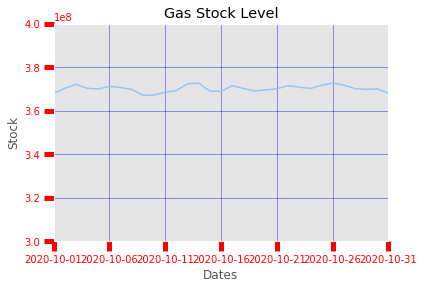

In [54]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

plt.style.use('seaborn-pastel')

fig, ax = plt.subplots()

stock_level.plot(kind='line', y="GasStock", x="GasDay", ax=ax)

ax.set_ylim([300000000, 400000000])
ax.set(title='Gas Stock Level', xlabel='Dates', ylabel='Stock')
ax.legend().set_visible(False)

ax.tick_params(direction='out', length=10, width=5, colors='r', grid_color='b', grid_alpha=0.5)

#### 3.2 Nominations

In [55]:
dfnominations = pd.DataFrame(columns=['GasDay','Entry Nomination', 'Exit Nomination'])
s_level = gas_transmission.transport(startDate=start_date,endDate=end_date)

x=0
daterange = pd.date_range(start_date, end_date)
for single_date in daterange:
#    new_row = {'GasDay':single_date.strftime("%Y-%m-%d"), 'GasStock':s_level}
    a = single_date.strftime("%Y-%m-%d")
    b = s_level[1][x]
    c = s_level[2][x]
    new_row = {'GasDay':a, 'Entry Nomination':b, 'Exit Nomination':c}
    dfnominations = dfnominations.append(new_row, ignore_index=True)
    x=x+1
dfnominations

,GasDay,Entry Nomination,Exit Nomination
0,2020-10-01,131297158,130174975
1,2020-10-02,130709406,128820873
2,2020-10-03,117805143,116667699
3,2020-10-04,103792466,112708433
4,2020-10-05,122857112,131535668
5,2020-10-06,131533354,129275248
6,2020-10-07,128789181,128850453
7,2020-10-08,127979570,128028658
8,2020-10-09,120056322,119543094
9,2020-10-10,116230469,116227903


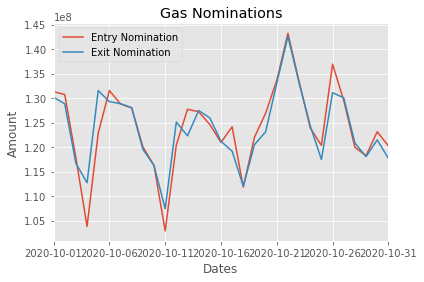

In [56]:
plt.style.use('ggplot')

fig, ax = plt.subplots()

dfnominations.plot(kind='line', x="GasDay", ax=ax)

# ax.set_ylim([0, 400000000])
ax.set(title='Gas Nominations', xlabel='Dates', ylabel='Amount')
ax.legend().set_visible(True)

# ax.tick_params(direction='out', length=10, width=5, colors='r', grid_color='b', grid_alpha=0.5)

#### 3.3 Gas Prices

In [57]:
dfprice = pd.DataFrame(columns=['GasDay','BalancingGasPurchase','BalancingGasSale','GasReferencePrice','Imbalance'])
s_price = gas.price_mobile(startDate=start_date,endDate=end_date)

x=0
daterange = pd.date_range(start_date, end_date)
for single_date in daterange:
    #    new_row = {'GasDay':single_date.strftime("%Y-%m-%d"), 'GasStock':s_level}
    a = single_date.strftime("%Y-%m-%d")
    b = s_price[0][x]
    c = s_price[1][x]
    d = s_price[2][x]
    e = s_price[4][x]
        
    new_row = {'GasDay':a,'BalancingGasPurchase':b, 'BalancingGasSale':c,'GasReferencePrice':d, 'Imbalance':e }
    dfprice = dfprice.append(new_row, ignore_index=True)
    x=x+1
dfprice

,GasDay,BalancingGasPurchase,BalancingGasSale,GasReferencePrice,Imbalance
0,2020-10-01,1365.74,1365.74,1325.96,-213443
1,2020-10-02,1350.32,1350.32,1310.99,2313486
2,2020-10-03,1340.97,1340.97,1301.91,1881368
3,2020-10-04,1338.51,1338.51,1299.52,-1855673
4,2020-10-05,1338.77,1338.77,1299.78,-309503
5,2020-10-06,1339.14,1339.14,1300.14,1186463
6,2020-10-07,1339.04,1339.04,1300.04,-500024
7,2020-10-08,1340.28,1340.28,1301.24,-900997
8,2020-10-09,1347.23,1347.23,1307.99,-2625634
9,2020-10-10,1349.63,1349.63,1310.32,6876


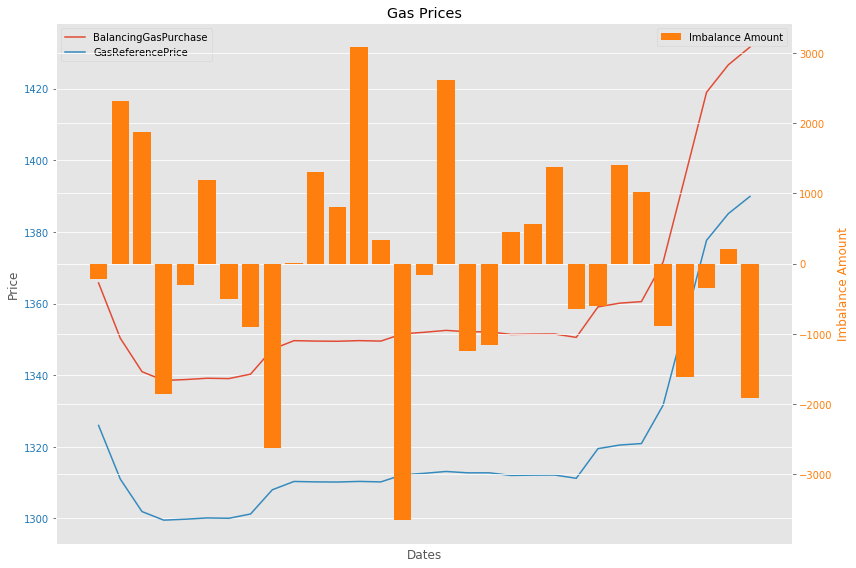

In [58]:
import matplotlib.dates as mdates

plt.style.use('ggplot')

fig, ax1 = plt.subplots(figsize=(12,8))
# ax.set_ylim([0, 400000000])
ax1.set(title='Gas Prices', xlabel='Dates', ylabel='Price')

color = 'tab:blue'

# ax.tick_params(direction='out', length=10, width=5, colors='r', grid_color='b', grid_alpha=0.5)
ax1.plot(dfprice['GasDay'], dfprice[['BalancingGasPurchase', 'GasReferencePrice']])
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['BalancingGasPurchase', 'GasReferencePrice']).set_visible(True)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:orange'

ax2.set_ylabel('Imbalance Amount', color=color)  # we already handled the x-label with ax1
ax2.bar(dfprice['GasDay'], dfprice['Imbalance']/1000, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(['Imbalance Amount'], loc=1).set_visible(True)

#ax1.xaxis.set_major_locator(mdates.ConciseDateFormatter(7))   #to get a tick every 15 minutes
# ax2.xaxis.set_major_locator(mdates.ConciseDateFormatter(7))   #to get a tick every 15 minutes
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))     

ax1.xaxis.set_major_locator(mdates.DayLocator(interval=7))
#ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))


fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


BGP vs GRF

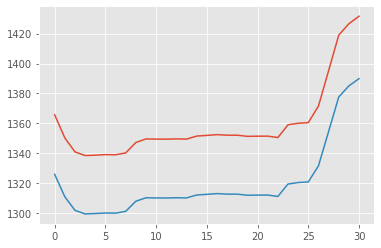

In [59]:
data=dfprice[[ 'BalancingGasPurchase', 'GasReferencePrice']]
plt.plot(data)